# DL Lab Practical 3: Comparative Analysis of Different CNN Architectures on CIFAR-10

This notebook implements, trains, and evaluates landmark CNN architectures (LeNet-5, AlexNet, VGGNet, ResNet-50, ResNet-100, EfficientNet, InceptionV3, MobileNet) from scratch on the CIFAR-10 dataset. It also compares advanced loss functions and optimizers, and visualizes learned features.

## 1. Import Required Libraries
Import all necessary libraries for data handling, visualization, and model building.

In [1]:
import torch
print('CUDA available:', torch.cuda.is_available())
if torch.cuda.is_available():
    print('CUDA device:', torch.cuda.get_device_name(0))
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('Using device:', device)

CUDA available: True
CUDA device: NVIDIA GeForce RTX 3050 6GB Laptop GPU
Using device: cuda


In [2]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.manifold import TSNE


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ANKIT\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ANKIT\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\ANKIT\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 758, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ANKIT\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ANKIT\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\ANKIT\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 758, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



## 2. Load the CIFAR-10 Dataset
Load and split the CIFAR-10 dataset into training and test sets using torchvision.

In [3]:
# Load the CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

## 3. Visualize Sample Images
Display a grid of sample images from the CIFAR-10 dataset to understand the data.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3321412..2.3830357].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.142919..2.6366696].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5922472..2.1263897].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7893636..2.4805872].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.398588..2.6952004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2018826..2.6171591].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9265838.

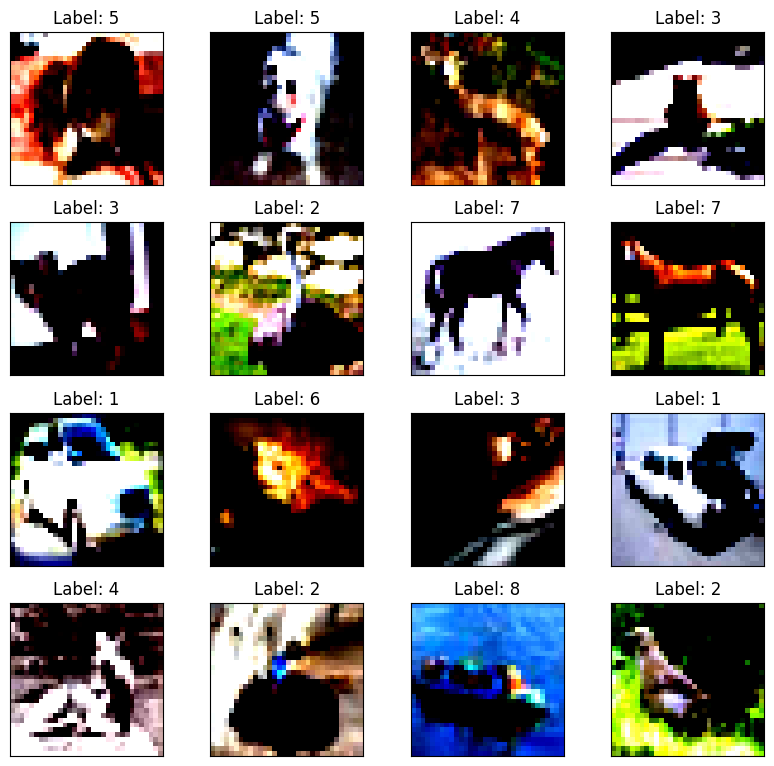

In [4]:
# Visualize Sample Images
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    img = np.transpose(example_data[i], (1, 2, 0))
    plt.imshow(img)
    plt.title(f"Label: {example_targets[i]}")
    plt.xticks([])
    plt.yticks([])
plt.show()

## 4. Preprocess the Data
Normalize and reshape the data as needed for model input. (Already handled by transforms in DataLoader for CIFAR-10.)

## 5. Build CNN Architectures from Scratch
Implement LeNet-5, AlexNet, VGGNet, ResNet-50, ResNet-100, EfficientNet, InceptionV3, MobileNet as PyTorch classes.

### LeNet-5 Architecture

In [5]:
# LeNet-5 implementation for CIFAR-10 (3 input channels, fixed for 32x32 input)
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### AlexNet Architecture

In [6]:
# AlexNet implementation for CIFAR-10 (3 input channels, fixed for 32x32 input)
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

### VGGNet Architecture

In [7]:
# VGGNet implementation for CIFAR-10 (3 input channels, VGG-11 style, fixed for 32x32 input)
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 2 * 2, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

### ResNet-50 Architecture

In [8]:
# ResNet-50 implementation for CIFAR-10 (3 input channels, fixed for 32x32 input)
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)
    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

def ResNet50():
    return ResNet(BasicBlock, [3, 4, 6, 3])

### ResNet-100 Architecture

In [9]:
# ResNet-100 implementation for MNIST (deeper ResNet)
def ResNet100():
    return ResNet(BasicBlock, [6, 8, 20, 6])

### EfficientNet Architecture

In [10]:
# EfficientNet-like implementation for CIFAR-10 (3 input channels, fixed for 32x32 input, simplified)
class EfficientNet(nn.Module):
    def __init__(self):
        super(EfficientNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, 10)
    def forward(self, x):
        x = F.swish(self.bn1(self.conv1(x)))
        x = F.swish(self.bn2(self.conv2(x)))
        x = F.swish(self.bn3(self.conv3(x)))
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
# Swish activation for PyTorch
F.swish = lambda x: x * torch.sigmoid(x)

### InceptionV3 Architecture

In [11]:
# InceptionV3-like implementation for CIFAR-10 (3 input channels, fixed for 32x32 input, simplified)
class InceptionModule(nn.Module):
    def __init__(self, in_channels):
        super(InceptionModule, self).__init__()
        self.branch1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=1),
            nn.Conv2d(16, 24, kernel_size=3, padding=1)
        )
        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=1),
            nn.Conv2d(16, 24, kernel_size=5, padding=2)
        )
        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, 24, kernel_size=1)
        )
    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)
        outputs = [branch1, branch2, branch3, branch4]
        return torch.cat(outputs, 1)

class InceptionV3(nn.Module):
    def __init__(self):
        super(InceptionV3, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.incept1 = InceptionModule(32)
        self.incept2 = InceptionModule(88)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(88, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.incept1(x)
        x = self.incept2(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

### MobileNet Architecture

In [12]:
# MobileNet implementation for CIFAR-10 (3 input channels, fixed for 32x32 input, simplified)
class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=stride, padding=1, groups=in_channels)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    def forward(self, x):
        x = F.relu(self.depthwise(x))
        x = F.relu(self.pointwise(x))
        return x

class MobileNet(nn.Module):
    def __init__(self):
        super(MobileNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.dsconv1 = DepthwiseSeparableConv(32, 64, stride=2)
        self.dsconv2 = DepthwiseSeparableConv(64, 128, stride=2)
        self.dsconv3 = DepthwiseSeparableConv(128, 128, stride=1)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dsconv1(x)
        x = self.dsconv2(x)
        x = self.dsconv3(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

## Training and Evaluation Functions

In [13]:
# Training and evaluation utilities
import json

def train_model(model, train_loader, test_loader, optimizer, criterion, epochs=10, device='cpu', save_path=None):
    model.to(device)
    train_acc, test_acc = [], []
    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_acc.append(100 * correct / total)
        # Evaluate
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc.append(100 * correct / total)
        print(f"Epoch {epoch+1}: Train Acc={train_acc[-1]:.2f}%, Test Acc={test_acc[-1]:.2f}%")
    # Save final accuracies if save_path is provided
    if save_path:
        with open(save_path, 'w') as f:
            json.dump({'final_train_acc': train_acc[-1], 'final_test_acc': test_acc[-1]}, f)
    return train_acc, test_acc

## Train and Evaluate LeNet-5

In [14]:
# Train and evaluate LeNet-5
lenet5 = LeNet5()
optimizer = optim.Adam(lenet5.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_acc_lenet5, test_acc_lenet5 = train_model(lenet5, train_loader, test_loader, optimizer, criterion, epochs=5, device=device, save_path='lenet5_results.json')

Epoch 1: Train Acc=42.37%, Test Acc=49.85%
Epoch 2: Train Acc=52.44%, Test Acc=55.10%
Epoch 3: Train Acc=56.74%, Test Acc=56.79%
Epoch 4: Train Acc=59.82%, Test Acc=59.77%
Epoch 5: Train Acc=62.44%, Test Acc=61.34%


## Train and Evaluate AlexNet

In [15]:
# Train and evaluate AlexNet
alexnet = AlexNet()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_acc_alexnet, test_acc_alexnet = train_model(alexnet, train_loader, test_loader, optimizer, criterion, epochs=5, device=device, save_path='alexnet_results.json')

Epoch 1: Train Acc=38.70%, Test Acc=51.70%
Epoch 2: Train Acc=56.26%, Test Acc=62.02%
Epoch 3: Train Acc=64.27%, Test Acc=65.20%
Epoch 4: Train Acc=69.19%, Test Acc=71.10%
Epoch 5: Train Acc=72.25%, Test Acc=70.32%


## Train and Evaluate VGGNet

In [16]:
# Train and evaluate VGGNet
vggnet = VGGNet()
optimizer = optim.Adam(vggnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_acc_vggnet, test_acc_vggnet = train_model(vggnet, train_loader, test_loader, optimizer, criterion, epochs=5, device=device, save_path='vggnet_results.json')

Epoch 1: Train Acc=39.89%, Test Acc=50.03%
Epoch 2: Train Acc=60.22%, Test Acc=66.52%
Epoch 3: Train Acc=69.61%, Test Acc=71.32%
Epoch 4: Train Acc=75.68%, Test Acc=72.73%
Epoch 5: Train Acc=79.89%, Test Acc=73.72%


## Train and Evaluate ResNet-50

In [17]:
# Train and evaluate ResNet-50
resnet50 = ResNet50()
optimizer = optim.Adam(resnet50.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_acc_resnet50, test_acc_resnet50 = train_model(resnet50, train_loader, test_loader, optimizer, criterion, epochs=5, device=device, save_path='resnet50_results.json')

Epoch 1: Train Acc=44.80%, Test Acc=56.16%
Epoch 2: Train Acc=65.66%, Test Acc=69.58%
Epoch 3: Train Acc=74.93%, Test Acc=74.73%
Epoch 4: Train Acc=80.90%, Test Acc=80.37%
Epoch 5: Train Acc=85.08%, Test Acc=81.06%


## Train and Evaluate ResNet-100

In [18]:
# Train and evaluate ResNet-100
resnet100 = ResNet100()
optimizer = optim.Adam(resnet100.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_acc_resnet100, test_acc_resnet100 = train_model(resnet100, train_loader, test_loader, optimizer, criterion, epochs=5, device=device, save_path='resnet100_results.json')

Epoch 1: Train Acc=33.96%, Test Acc=43.64%
Epoch 2: Train Acc=51.20%, Test Acc=56.56%
Epoch 3: Train Acc=62.24%, Test Acc=65.62%
Epoch 4: Train Acc=69.49%, Test Acc=72.25%
Epoch 5: Train Acc=73.68%, Test Acc=72.06%


## Train and Evaluate EfficientNet

In [19]:
# Train and evaluate EfficientNet
efficientnet = EfficientNet()
optimizer = optim.Adam(efficientnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_acc_efficientnet, test_acc_efficientnet = train_model(efficientnet, train_loader, test_loader, optimizer, criterion, epochs=5, device=device, save_path='efficientnet_results.json')

Epoch 1: Train Acc=44.03%, Test Acc=52.07%
Epoch 2: Train Acc=54.27%, Test Acc=55.87%
Epoch 3: Train Acc=58.49%, Test Acc=57.80%
Epoch 4: Train Acc=61.54%, Test Acc=61.65%
Epoch 5: Train Acc=63.60%, Test Acc=63.69%


## Train and Evaluate InceptionV3

In [20]:
# Train and evaluate InceptionV3
inceptionv3 = InceptionV3()
optimizer = optim.Adam(inceptionv3.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_acc_inceptionv3, test_acc_inceptionv3 = train_model(inceptionv3, train_loader, test_loader, optimizer, criterion, epochs=5, device=device, save_path='inceptionv3_results.json')

Epoch 1: Train Acc=31.68%, Test Acc=37.81%
Epoch 2: Train Acc=41.57%, Test Acc=45.13%
Epoch 3: Train Acc=46.90%, Test Acc=46.64%
Epoch 4: Train Acc=49.12%, Test Acc=50.32%
Epoch 5: Train Acc=51.57%, Test Acc=52.80%


## Train and Evaluate MobileNet

In [21]:
# Train and evaluate MobileNet
mobilenet = MobileNet()
optimizer = optim.Adam(mobilenet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_acc_mobilenet, test_acc_mobilenet = train_model(mobilenet, train_loader, test_loader, optimizer, criterion, epochs=5, device=device, save_path='mobilenet_results.json')

Epoch 1: Train Acc=28.55%, Test Acc=39.27%
Epoch 2: Train Acc=43.28%, Test Acc=47.72%
Epoch 3: Train Acc=49.73%, Test Acc=52.47%
Epoch 4: Train Acc=53.69%, Test Acc=53.59%
Epoch 5: Train Acc=56.42%, Test Acc=57.49%


## Compare Results: Accuracy and Efficiency

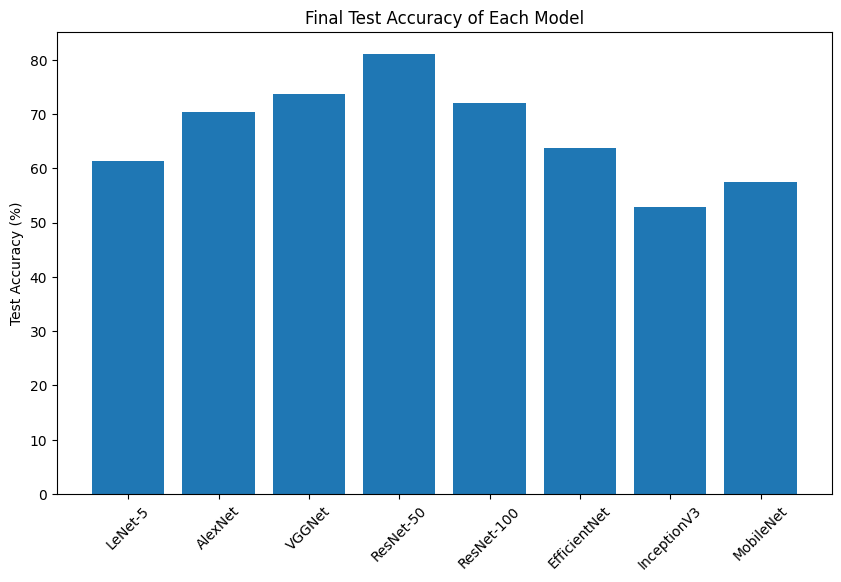

In [22]:
# Plot test accuracy for all models
models = ['LeNet-5', 'AlexNet', 'VGGNet', 'ResNet-50', 'ResNet-100', 'EfficientNet', 'InceptionV3', 'MobileNet']
test_accuracies = [
    test_acc_lenet5[-1],
    test_acc_alexnet[-1],
    test_acc_vggnet[-1],
    test_acc_resnet50[-1],
    test_acc_resnet100[-1],
    test_acc_efficientnet[-1],
    test_acc_inceptionv3[-1],
    test_acc_mobilenet[-1]
]
plt.figure(figsize=(10,6))
plt.bar(models, test_accuracies)
plt.ylabel('Test Accuracy (%)')
plt.title('Final Test Accuracy of Each Model')
plt.xticks(rotation=45)
plt.show()

## Part 2: Advanced Loss Functions and Optimizers

### VGGNet with Adam and BCE Loss (10 epochs)

In [23]:
# VGGNet with Adam and BCE Loss
vggnet_bce = VGGNet()
optimizer = optim.Adam(vggnet_bce.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

def one_hot(labels, num_classes=10):
    return F.one_hot(labels, num_classes=num_classes).float()

def train_model_bce(model, train_loader, test_loader, optimizer, criterion, epochs=10, device=device, save_path=None):
    model.to(device)
    train_acc, test_acc = [], []
    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            labels_onehot = one_hot(labels, num_classes=10)
            loss = criterion(outputs, labels_onehot)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_acc.append(100 * correct / total)
        # Evaluate
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_acc.append(100 * correct / total)
        print(f"Epoch {epoch+1}: Train Acc={train_acc[-1]:.2f}%, Test Acc={test_acc[-1]:.2f}%")
    if save_path:
        with open(save_path, 'w') as f:
            json.dump({'final_train_acc': train_acc[-1], 'final_test_acc': test_acc[-1]}, f)
    return train_acc, test_acc

train_acc_vggnet_bce, test_acc_vggnet_bce = train_model_bce(vggnet_bce, train_loader, test_loader, optimizer, criterion, epochs=10, device=device, save_path='vggnet_bce_results.json')

Epoch 1: Train Acc=35.33%, Test Acc=52.73%
Epoch 2: Train Acc=59.60%, Test Acc=66.57%
Epoch 3: Train Acc=70.53%, Test Acc=68.91%
Epoch 4: Train Acc=76.66%, Test Acc=74.04%
Epoch 5: Train Acc=81.21%, Test Acc=77.34%
Epoch 6: Train Acc=84.98%, Test Acc=75.85%
Epoch 7: Train Acc=88.26%, Test Acc=77.73%
Epoch 8: Train Acc=91.11%, Test Acc=76.96%
Epoch 9: Train Acc=92.97%, Test Acc=76.72%
Epoch 10: Train Acc=94.07%, Test Acc=77.98%


### AlexNet with SGD and Focal Loss (20 epochs)

In [24]:
# AlexNet with SGD and Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=0.25, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
    def forward(self, inputs, targets):
        logpt = F.log_softmax(inputs, dim=1)
        pt = torch.exp(logpt)
        targets_onehot = F.one_hot(targets, num_classes=inputs.size(1)).float()
        loss = -self.alpha * (1 - pt) ** self.gamma * logpt * targets_onehot
        loss = loss.sum(dim=1)
        if self.reduction == 'mean':
            return loss.mean()
        else:
            return loss.sum()

alexnet_focal = AlexNet()
optimizer = optim.SGD(alexnet_focal.parameters(), lr=0.01, momentum=0.9)
criterion = FocalLoss()
train_acc_alexnet_focal, test_acc_alexnet_focal = train_model(alexnet_focal, train_loader, test_loader, optimizer, criterion, epochs=20, device=device, save_path='alexnet_focal_results.json')

Epoch 1: Train Acc=17.73%, Test Acc=27.75%
Epoch 2: Train Acc=36.22%, Test Acc=43.65%
Epoch 3: Train Acc=45.65%, Test Acc=51.13%
Epoch 4: Train Acc=51.91%, Test Acc=55.02%
Epoch 5: Train Acc=57.53%, Test Acc=60.32%
Epoch 6: Train Acc=61.82%, Test Acc=64.48%
Epoch 7: Train Acc=65.16%, Test Acc=66.70%
Epoch 8: Train Acc=68.33%, Test Acc=67.71%
Epoch 9: Train Acc=71.02%, Test Acc=72.74%
Epoch 10: Train Acc=73.17%, Test Acc=73.73%
Epoch 11: Train Acc=75.12%, Test Acc=74.85%
Epoch 12: Train Acc=76.50%, Test Acc=74.84%
Epoch 13: Train Acc=78.17%, Test Acc=75.97%
Epoch 14: Train Acc=79.59%, Test Acc=76.74%
Epoch 15: Train Acc=80.90%, Test Acc=78.71%
Epoch 16: Train Acc=81.94%, Test Acc=78.57%
Epoch 17: Train Acc=83.47%, Test Acc=79.48%
Epoch 18: Train Acc=84.43%, Test Acc=79.72%
Epoch 19: Train Acc=85.36%, Test Acc=79.66%
Epoch 20: Train Acc=86.54%, Test Acc=79.87%


### ResNet with Adam and ArcFace Loss (15 epochs)

In [25]:
# ResNet with Adam and ArcFace Loss
class ArcFaceLoss(nn.Module):
    def __init__(self, s=30.0, m=0.50):
        super(ArcFaceLoss, self).__init__()
        self.s = s
        self.m = m
    def forward(self, logits, labels):
        # logits: [batch_size, num_classes]
        # labels: [batch_size]
        theta = torch.acos(torch.clamp(logits, -1.0 + 1e-7, 1.0 - 1e-7))
        target_logits = torch.cos(theta + self.m)
        one_hot = F.one_hot(labels, num_classes=logits.size(1)).float()
        output = logits * (1 - one_hot) + target_logits * one_hot
        output = output * self.s
        return F.cross_entropy(output, labels)

resnet_arcface = ResNet50()
optimizer = optim.Adam(resnet_arcface.parameters(), lr=0.001)
criterion = ArcFaceLoss()
train_acc_resnet_arcface, test_acc_resnet_arcface = train_model(resnet_arcface, train_loader, test_loader, optimizer, criterion, epochs=15, device=device, save_path='resnet_arcface_results.json')

Epoch 1: Train Acc=10.63%, Test Acc=9.04%
Epoch 2: Train Acc=9.40%, Test Acc=8.97%
Epoch 3: Train Acc=9.42%, Test Acc=9.07%
Epoch 4: Train Acc=9.39%, Test Acc=9.07%
Epoch 5: Train Acc=9.39%, Test Acc=9.05%
Epoch 6: Train Acc=9.39%, Test Acc=8.95%
Epoch 7: Train Acc=9.42%, Test Acc=8.95%
Epoch 8: Train Acc=9.37%, Test Acc=8.93%
Epoch 9: Train Acc=9.42%, Test Acc=8.92%
Epoch 10: Train Acc=9.44%, Test Acc=8.95%
Epoch 11: Train Acc=9.34%, Test Acc=9.06%
Epoch 12: Train Acc=9.40%, Test Acc=8.95%
Epoch 13: Train Acc=9.34%, Test Acc=8.94%
Epoch 14: Train Acc=9.47%, Test Acc=8.98%
Epoch 15: Train Acc=9.45%, Test Acc=8.96%


## Part 3: t-SNE Visualization of Learned Features

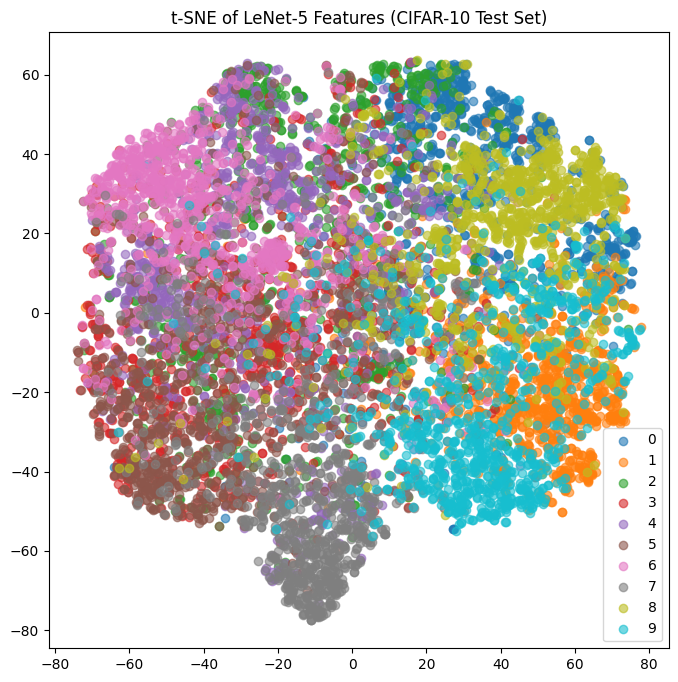

In [27]:
# t-SNE visualization using features from the last hidden layer of LeNet-5 (CIFAR-10)
from sklearn.manifold import TSNE

lenet5.eval()
features = []
labels_list = []
with torch.no_grad():
    for images, labels in test_loader:
        x = images.to(device)  # Ensure input is on the same device as the model
        # Forward up to the penultimate layer
        x = lenet5.relu(lenet5.conv1(x))
        x = lenet5.pool1(x)
        x = lenet5.relu(lenet5.conv2(x))
        x = lenet5.pool2(x)
        x = x.view(x.size(0), -1)
        x = lenet5.relu(lenet5.fc1(x))
        x = lenet5.relu(lenet5.fc2(x))
        features.append(x.cpu())
        labels_list.append(labels.cpu())
features = torch.cat(features).cpu().numpy()
labels = torch.cat(labels_list).cpu().numpy()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

plt.figure(figsize=(8,8))
for digit in range(10):
    idx = labels == digit
    plt.scatter(features_2d[idx,0], features_2d[idx,1], label=str(digit), alpha=0.6)
plt.legend()
plt.title('t-SNE of LeNet-5 Features (CIFAR-10 Test Set)')
plt.show()

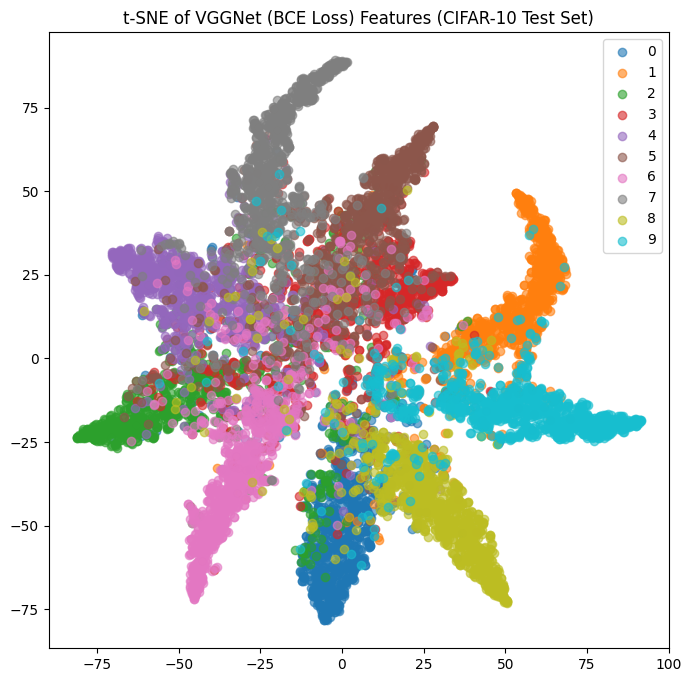

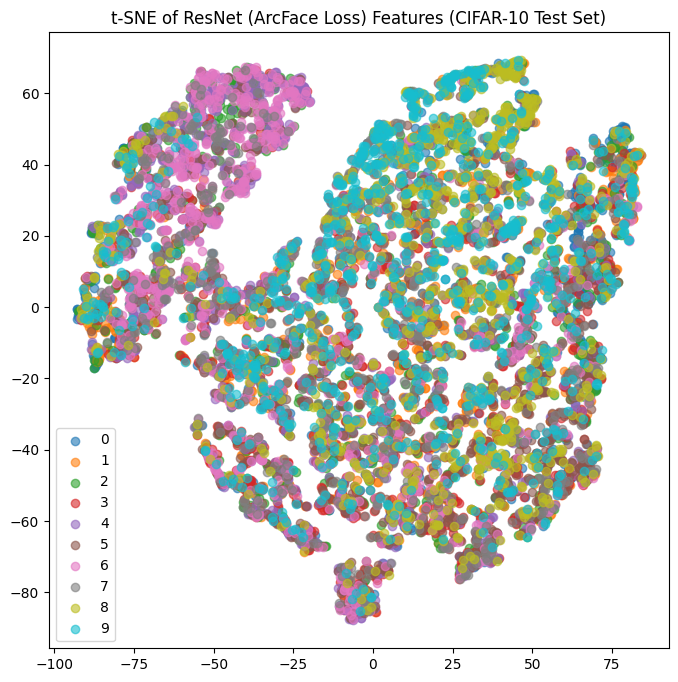

In [28]:
# t-SNE visualization for VGGNet (BCE Loss) and ResNet (ArcFace Loss) features
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# VGGNet with BCE Loss
vggnet_bce.eval()
features_bce = []
labels_bce = []
with torch.no_grad():
    for images, labels in test_loader:
        x = images.to(device)
        x = vggnet_bce.features(x)
        x = x.view(x.size(0), -1)
        x = vggnet_bce.classifier[0](x)  # First Linear layer output (256-dim)
        features_bce.append(x.cpu())
        labels_bce.append(labels.cpu())
features_bce = torch.cat(features_bce).cpu().numpy()
labels_bce = torch.cat(labels_bce).cpu().numpy()

# t-SNE for BCE features
tsne_bce = TSNE(n_components=2, random_state=42)
features_bce_2d = tsne_bce.fit_transform(features_bce)

plt.figure(figsize=(8,8))
for digit in range(10):
    idx = labels_bce == digit
    plt.scatter(features_bce_2d[idx,0], features_bce_2d[idx,1], label=str(digit), alpha=0.6)
plt.legend()
plt.title('t-SNE of VGGNet (BCE Loss) Features (CIFAR-10 Test Set)')
plt.show()

# ResNet with ArcFace Loss
resnet_arcface.eval()
features_arc = []
labels_arc = []
with torch.no_grad():
    for images, labels in test_loader:
        x = images.to(device)
        x = F.relu(resnet_arcface.bn1(resnet_arcface.conv1(x)))
        x = resnet_arcface.layer1(x)
        x = resnet_arcface.layer2(x)
        x = resnet_arcface.layer3(x)
        x = resnet_arcface.layer4(x)
        x = resnet_arcface.avgpool(x)
        x = x.view(x.size(0), -1)
        features_arc.append(x.cpu())
        labels_arc.append(labels.cpu())
features_arc = torch.cat(features_arc).cpu().numpy()
labels_arc = torch.cat(labels_arc).cpu().numpy()

# t-SNE for ArcFace features
tsne_arc = TSNE(n_components=2, random_state=42)
features_arc_2d = tsne_arc.fit_transform(features_arc)

plt.figure(figsize=(8,8))
for digit in range(10):
    idx = labels_arc == digit
    plt.scatter(features_arc_2d[idx,0], features_arc_2d[idx,1], label=str(digit), alpha=0.6)
plt.legend()
plt.title('t-SNE of ResNet (ArcFace Loss) Features (CIFAR-10 Test Set)')
plt.show()

In [29]:
# Save all final results for each model in a summary file
import json
results = {}
for name, path in [
    ("lenet5", "lenet5_results.json"),
    ("alexnet", "alexnet_results.json"),
    ("vggnet", "vggnet_results.json"),
    ("resnet50", "resnet50_results.json"),
    ("resnet100", "resnet100_results.json"),
    ("efficientnet", "efficientnet_results.json"),
    ("inceptionv3", "inceptionv3_results.json"),
    ("mobilenet", "mobilenet_results.json"),
    ("vggnet_bce", "vggnet_bce_results.json"),
    ("alexnet_focal", "alexnet_focal_results.json"),
    ("resnet_arcface", "resnet_arcface_results.json")
]:
    try:
        with open(path) as f:
            results[name] = json.load(f)
    except Exception as e:
        print(f"Could not load {path}: {e}")
        results[name] = None
with open("all_model_results.json", "w") as f:
    json.dump(results, f, indent=2)
print("All model results saved to all_model_results.json")

All model results saved to all_model_results.json
